<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

!pip install bs4
from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# visualize os resultados
fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [4]:
# manipule os dados
estados_bruto = fonte.find_all('estado')

estados_limpo = [['estado', 'sigla', 'região']]

# continue o codigo aqui
for estado in estados_bruto:
    idid = estado.find('id').text
    nome = estado.find('nome').text
    idcapital = estado.find('idcapital').text
    sigla = estado.find('sigla').text
    regiao = estado.find('regiao').text

    estados_limpo.append([nome,sigla,regiao])

In [6]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui
import csv

with open(NOME_ARQUIVO_DESTINO, mode='w', encoding='utf8') as arquivo:
    escritor_csv = csv.writer(arquivo, delimiter=';')
    escritor_csv.writerows(estados_limpo)

with open('estados-limpo.csv', mode='r', encoding='utf8') as arquivo:
    texto = arquivo.read()

print(texto)

estado;sigla;região
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
AMAZONAS;AM;NORTE
BAHIA;BA;NORDESTE
CEARA;CE;NORDESTE
DISTRITO FEDERAL;DF;CENTRO-OESTE
ESPIRITO SANTO;ES;SUDESTE
GOIAS;GO;CENTRO-OESTE
MARANHAO;MA;NORDESTE
MATO GROSSO;MT;CENTRO-OESTE
MATO GROSSO DO SUL;MS;CENTRO-OESTE
PARA;PA;NORTE
PARAIBA;PB;NORDESTE
PARANA;PR;SUL
PERNAMBUCO;PE;NORDESTE
PIAUI;PI;NORDESTE
RIO DE JANEIRO;RJ;SUDESTE
RIO GRANDE DO NORTE;RN;NORDESTE
RIO GRANDE DO SUL;RS;SUL
RONDONIA;RO;NORTE
RORAIMA;RR;NORTE
SANTA CATARINA;SC;SUL
SAO PAULO;SP;SUDESTE
SERGIPE;SE;NORDESTE
TOCANTINS;TO;NORTE
MINAS GERAIS;MG;SUDESTE



### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [7]:
# ler o arquivo cidades-bruto.csv
import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE) # continue o codigo aqui
print(fonte)

                                                  FID   gid  \
0     vw_pib_percapita.fid-4514e25a_17aaa325034_-258f   215   
1     vw_pib_percapita.fid-4514e25a_17aaa325034_-258e   306   
2     vw_pib_percapita.fid-4514e25a_17aaa325034_-258d   900   
3     vw_pib_percapita.fid-4514e25a_17aaa325034_-258c  3613   
4     vw_pib_percapita.fid-4514e25a_17aaa325034_-258b  1028   
...                                               ...   ...   
5561   vw_pib_percapita.fid-4514e25a_17aaa325034_-eba  5254   
5562   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9  2749   
5563   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8  3779   
5564   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7   617   
5565   vw_pib_percapita.fid-4514e25a_17aaa325034_-eb6   672   

                     UF              nome   Censo           PIB  Pop_est_2009  \
0                 BAHIA          Tremedal  2010.0  5.788399e+04         18433   
1     RIO GRANDE DO SUL            Turuçu  2010.0  4.572388e+04          4000   


In [8]:
# visualize os resultados
censo_2010 = fonte[lambda censo: fonte['Censo'] == 2010]
dados_df = censo_2010[['UF', "nome", 'Pop_est_2009', 'PIB', 'PIB_percapita']]

In [9]:
dados_df

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [10]:
# manipule os dados
dados_df.columns = ['estado', 'cidade', 'populacao', 'pib','pib_percapita']
print(dados_df)

                 estado            cidade  populacao           pib  \
0                 BAHIA          Tremedal      18433  5.788399e+04   
1     RIO GRANDE DO SUL            Turuçu       4000  4.572388e+04   
2        ESPIRITO SANTO           Vitória     320156  1.978263e+07   
3          MINAS GERAIS         Jacutinga      21424  2.478160e+05   
4                 PIAUÍ           Nazária       7895  2.095138e+04   
...                 ...               ...        ...           ...   
5561     SANTA CATARINA         Campo Erê       9737  1.876289e+05   
5562             PARANÁ          Planalto      13983  1.385535e+05   
5563          SÃO PAULO        Guararapes      29639  5.320191e+05   
5564  RIO GRANDE DO SUL  Barra do Guarita       3067  2.198064e+04   
5565  RIO GRANDE DO SUL        Machadinho       5623  5.715017e+04   

      pib_percapita  
0       3140.239990  
1      11430.969727  
2      61790.589844  
3      11567.209961  
4       2653.750000  
...             ...  
5561 

In [11]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'dados-limpos.csv'

# continue o codigo aqui
dados_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';')

dados_lidos_df = pd.read_csv(NOME_ARQUIVO_DESTINO, delimiter=';', index_col=None)

dados_lidos_df

,Unnamed: 0,estado,cidade,populacao,pib,pib_percapita
0,0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...,...
5550,5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5551,5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5552,5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5553,5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3

In [12]:
estados_df = pd.read_csv('estados-limpo.csv', delimiter=';')
cidades_df = pd.read_csv('dados-limpos.csv', delimiter=';')

estados_df.replace({
    'AMAPA': 'AMAPÁ',
    'CEARA': 'CEARÁ',
    'ESPIRITO SANTO': 'ESPÍRITO SANTO',
    'GOIAS': 'GOIÁS',
    'MARANHAO': 'MARANHÃO',
    'PARA': 'PARÁ',
    'PARAIBA': 'PARAÍBA',
    'PARANA': 'PARANÁ',
    'PIAUI': 'PIAUÍ',
    'RONDONIA': 'RONDÔNIA',
    'SAO PAULO': 'SÃO PAULO'
    }, inplace=True)


brasil_df = pd.merge(left=estados_df, right=cidades_df, on='estado', how='inner')

brasil_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

print(brasil_df.info())
print(estados_df.info())
print(cidades_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5477 entries, 0 to 5476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5477 non-null   object 
 1   sigla          5477 non-null   object 
 2   região         5477 non-null   object 
 3   cidade         5477 non-null   object 
 4   populacao      5477 non-null   int64  
 5   pib            5477 non-null   float64
 6   pib_percapita  5477 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 342.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   estado  27 non-null     object
 1   sigla   27 non-null     object
 2   região  27 non-null     object
dtypes: object(3)
memory usage: 776.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 6 c

In [13]:
brasil_df.to_csv('brasil.csv', index=False)

brasil_df_lido = pd.read_csv('brasil.csv')

In [14]:
brasil_df_lido

,estado,sigla,região,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5472,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5473,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5474,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,23627,2.886858e+05,12218.469727
5475,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1

In [15]:
brasil_df = pd.read_csv('brasil.csv')
brasil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5477 non-null   object 
 1   sigla          5477 non-null   object 
 2   região         5477 non-null   object 
 3   cidade         5477 non-null   object 
 4   populacao      5477 non-null   int64  
 5   pib            5477 non-null   float64
 6   pib_percapita  5477 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 299.6+ KB


In [16]:
brasil_df.isna().any().any()

False

### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta

In [17]:
brasil_df[['populacao','cidade']].sort_values(by='populacao', ascending=False).head(n=10).reset_index(drop=True)

,populacao,cidade
0,11037593,São Paulo
1,6186710,Rio de Janeiro
2,2998056,Salvador
3,2606885,Brasília
4,2505552,Fortaleza
5,2452617,Belo Horizonte
6,1851215,Curitiba
7,1738641,Manaus
8,1561659,Recife
9,1437600,Belém


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [18]:
# código para responder a pergunta

In [19]:
brasil_df[['pib_percapita','cidade', 'região']].sort_values(by='pib_percapita').query('região == "NORDESTE"').head().reset_index(drop=True).drop(['região'], axis=1)

,pib_percapita,cidade
0,1929.969971,São Vicente Ferrer
1,2203.830078,Cajapió
2,2358.239990,Dom Inocêncio
3,2368.159912,Timbiras
4,2416.969971,Axixá


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta

In [20]:
brasil_df[['pib','cidade', 'estado']].sort_values(by='pib', ascending=False).query('estado == "SÃO PAULO"').head(n=15).reset_index(drop=True).drop(['estado'], axis=1)

,pib,cidade
0,389317152.0,São Paulo
1,32473828.0,Guarulhos
2,31654720.0,Campinas
3,31616452.0,Osasco
4,28935768.0,São Bernardo do Campo
5,26908070.0,Barueri
6,22546134.0,Santos
7,22018042.0,São José dos Campos
8,16585137.0,Jundiaí
9,14709603.0,Santo André


 - Qual é o PIB do estado de Santa Catarina?

In [21]:
# código para responder a pergunta

In [22]:
brasil_df[['pib','estado']].query('estado == "SANTA CATARINA"').agg('sum').drop(['estado'])

pib    129806256.751953
dtype: object

 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta

In [23]:
brasil_df[['populacao','região']].query('região == "SUL"').agg('sum').drop(['região'])

populacao    27719118
dtype: object

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta

In [24]:
brasil_df[['pib_percapita','cidade', 'estado']].query('estado == "MATO GROSSO DO SUL"').agg('mean')

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


pib_percapita    14458.89686
dtype: float64

 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta

In [25]:
brasil_df['populacao'].agg('sum')

187688947

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [ ]:
# código para gerar a visualização

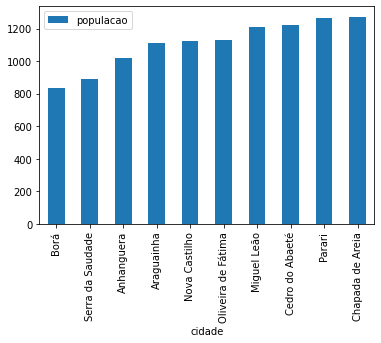

In [26]:
cidades_menos_populosas = brasil_df[['populacao','cidade']].sort_values(by='populacao').head(n=10).reset_index(drop=True)

cidades_menos_populosas.plot(kind='bar', y='populacao', x='cidade');

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [ ]:
# código para gerar a visualização

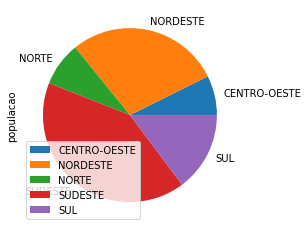

In [27]:
populacao_por_regiao = brasil_df[['populacao','região']].groupby('região').agg('sum')

populacao_por_regiao
populacao_por_regiao.plot(kind='pie', subplots=True);